# Literacy rate

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats


In [4]:
education_districtwise = pd.read_csv('C:/Users/0&1/OneDrive/Documents/education_districtwise.csv')

In [5]:

education_districtwise = education_districtwise.dropna()

In [6]:
education_districtwise.head()

,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI
0,DISTRICT32,STATE1,13,391,104,875564.0,66.92
1,DISTRICT649,STATE1,18,678,144,1015503.0,66.93
2,DISTRICT229,STATE1,8,94,65,1269751.0,71.21
3,DISTRICT259,STATE1,13,523,104,735753.0,57.98
4,DISTRICT486,STATE1,8,359,64,570060.0,65.00


In [8]:
education_districtwise.describe()

,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI
count,634.000000,634.000000,634.000000,6.340000e+02,634.000000
mean,11.118297,899.619874,124.610410,1.899024e+06,73.395189
std,9.799581,632.473675,95.821688,1.547475e+06,10.098460
min,1.000000,6.000000,1.000000,7.948000e+03,37.220000
25%,6.000000,396.750000,60.000000,8.226940e+05,66.437500
50%,8.000000,816.500000,105.000000,1.564392e+06,73.490000
75%,13.000000,1231.500000,167.000000,2.587520e+06,80.815000
max,66.000000,3963.000000,592.000000,1.105413e+07,98.760000


<AxesSubplot:>

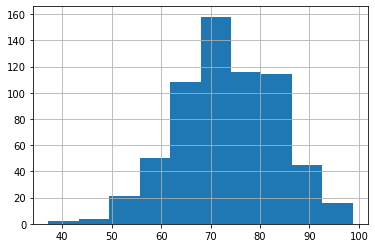

In [7]:
education_districtwise['OVERALL_LI'].hist()

# Empirical rule

we can expect that about:

- 68% of district literacy rates will fall within +/- 1 SD from the mean.
- 95% of district literacy rates will fall within +/- 2 SD from the mean.
- 99.7% of district literacy rates will fall within +/- 3 SD from the mean.

In [9]:
mean_overall_li = education_districtwise['OVERALL_LI'].mean()
mean_overall_li

73.39518927444797

In [10]:
std_overall_li = education_districtwise['OVERALL_LI'].std()
std_overall_li

10.098460413782469

In [11]:
lower_limit = mean_overall_li - 1 * std_overall_li
upper_limit = mean_overall_li + 1 * std_overall_li
((education_districtwise['OVERALL_LI'] >= lower_limit) & (education_districtwise['OVERALL_LI'] <= upper_limit)).mean()

0.6640378548895899

In [12]:
lower_limit = mean_overall_li - 2 * std_overall_li
upper_limit = mean_overall_li + 2 * std_overall_li
((education_districtwise['OVERALL_LI'] >= lower_limit) & (education_districtwise['OVERALL_LI'] <= upper_limit)).mean()

0.9542586750788643

In [13]:
lower_limit = mean_overall_li - 3 * std_overall_li
upper_limit = mean_overall_li + 3 * std_overall_li
((education_districtwise['OVERALL_LI'] >= lower_limit) & (education_districtwise['OVERALL_LI'] <= upper_limit)).mean()

0.9968454258675079

# Compute z-scores to find outliers

Observations with a z-score smaller than -3 or larger than +3 as outliers. In other words, these are values that lie more than +/- 3 SDs from the mean.

In [14]:
education_districtwise['Z_SCORE'] = stats.zscore(education_districtwise['OVERALL_LI'])
education_districtwise

,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI,Z_SCORE
0,DISTRICT32,STATE1,13,391,104,875564.0,66.92,-0.641712
1,DISTRICT649,STATE1,18,678,144,1015503.0,66.93,-0.640721
2,DISTRICT229,STATE1,8,94,65,1269751.0,71.21,-0.216559
3,DISTRICT259,STATE1,13,523,104,735753.0,57.98,-1.527694
4,DISTRICT486,STATE1,8,359,64,570060.0,65.00,-0.831990
...,...,...,...,...,...,...,...,...
675,DISTRICT522,STATE29,37,876,137,5296396.0,78.05,0.461307
676,DISTRICT498,STATE29,64,1458,230,4042191.0,56.06,-1.717972
677,DISTRICT343,STATE29,59,1117,216,3483648.0,65.05,-0.827035
678,DISTRICT130,STATE29,51,993,211,3522644.0,66.16,-0.717030


In [15]:
education_districtwise[(education_districtwise['Z_SCORE'] > 3) | (education_districtwise['Z_SCORE'] < -3)]

,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI,Z_SCORE
434,DISTRICT461,STATE31,4,360,53,532791.0,42.67,-3.044964
494,DISTRICT429,STATE22,6,612,62,728677.0,37.22,-3.585076
